#Q1


In [ ]:
import cv2
import matplotlib.pyplot as plt
%cd '/content/drive/My Drive/Colab Notebooks/Assignment_3/src'

/content/drive/My Drive/Colab Notebooks/Assignment_3/src


##(A)

In [ ]:
def applyskeleton(img, theta):
  newimg = np.zeros(img.shape)
  p1 = np.array([
                [ 0, 0, 0],
                [-1, 1,-1],
                [ 1, 1, 1]
              ])
  p2 = np.array([
                [-1, 0, 0],
                [ 1, 1, 0],
                [-1, 1,-1]
             ])
  
  occur = int(theta / 90)
  for i in range(occur):
    p1 = np.rot90(p1)
    p2 = np.rot90(p2)
 
  rows,cols = img.shape
  count = 0
  for x in range(1,rows-1):
    for y in range(1,cols-1):
      p1_match = p2_match = False
      match = True
      for xx in range(-1,2):
        for yy in range(-1,2):
          adjx = x + xx
          adjy = y + yy
          if p1[xx+1][yy+1] != -1 and img[adjx][adjy] != p1[xx+1][yy+1]:
            match = False
            break
      if match:
        p1_match = True

      match = True
      for xx in range(-1,2):
        for yy in range(-1,2):
          
          adjx = x + xx
          adjy = y + yy
          
          if p2[xx+1][yy+1] != -1 and img[adjx][adjy] != p2[xx+1][yy+1]:
            match = False
            break
      
      if match:
        p2_match = True
      
    
      if p1_match or p2_match:
        count+= 1
        newimg[x][y] = 1
      else:
        newimg[x][y] = img[x][y]

  return newimg

def skeleton(ipimg):
  ret, ipimg = cv2. threshold(ipimg,127,255,cv2.THRESH_BINARY)
  plt.figure()
  for i in range(ipimg.shape[0]):
    for j in range(ipimg.shape[1]):
      if ipimg[i][j] == 255:
        ipimg[i][j] = 1
  ipimg = 1 - ipimg
  img = ipimg.copy()
  plt.imshow(img, cmap='gray')


  count = 7
  diff = 1
  while diff > 0 and count > 0:
    img = applyskeleton(img,0)
    
    img = applyskeleton(img,90)
    
    img = applyskeleton(img,180)
    
    img = applyskeleton(img,270)
    
    count -= 1
    print("count ",count, "print ",diff)
    diff = (np.mean(np.abs(img-ipimg)))
  

  return img


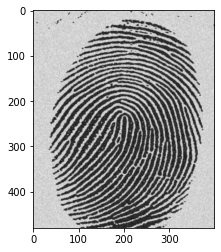

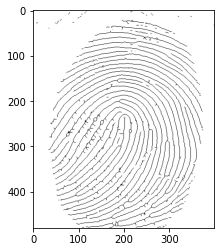

In [ ]:

img = cv2.imread('../images/thumb_print.jpg',0)
opimg = skeleton(img)
plt.figure()
plt.imshow(img, cmap='gray')
plt.figure()
plt.imshow(255-opimg, cmap='gray')

##(B)
S1 is used for edge detection and s2 is used to detect corners 

##(C)
At the end of each skeletonization pass the forground becomes thiner. So we want more passes hence final result becomes thinest.


##(D)

In [ ]:
img = cv2.imread('../images/keyhole.jpg',0)
plt.imshow(img)
opimg = skeleton(img)
plt.imshow(opimg)

#Q2

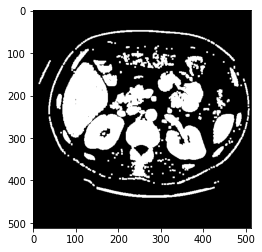

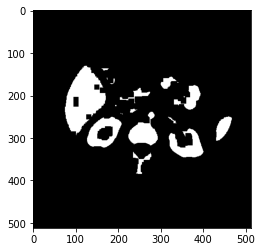

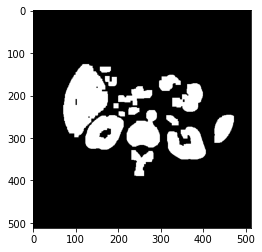

In [ ]:
ipimg = cv2.imread('../images/kidney.jpg' ,0)
ret, img = cv2.threshold(ipimg, 132, 255, cv2.THRESH_BINARY) 
# plt.imshow(img ,cmap='gray')
# plt.figure()

kernel = np.ones((4,4), np.uint8) 
dilation = cv2.dilate(img, kernel, iterations=1) 
plt.figure()
plt.imshow(dilation ,cmap='gray')

kernel = np.ones((12,12), np.uint8) 
erosion = cv2.erode(dilation, kernel, iterations=1) 
plt.figure("After erosion")
plt.imshow(erosion ,cmap='gray')

kernel = np.ones((10,10), np.uint8) 
dilation = cv2.dilate(erosion, kernel, iterations=1) 
plt.figure("After Dialation")
plt.imshow(dilation ,cmap='gray')

img = dilation

Total color  16
Color  179


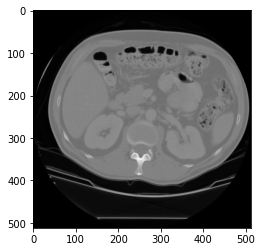

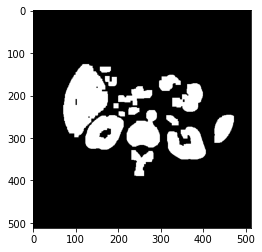

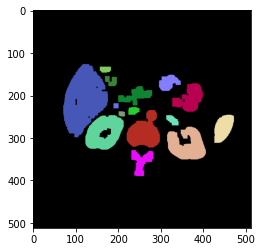

In [ ]:
parent = [-1]*100000000
def find(u):
    if(parent[u] == -1):
        return u
    x = find(parent[u])
    parent[u] = x
    return x


def Union(u,v):
    pu = find(u)
    pv = find(v)
    if (pu == pv):
        return
    parent[pu] = pv

def labelimage(img):
  limg = np.zeros(img.shape, dtype=int)
  
  row, col = img.shape
  color = 1
  for i in range(len(parent)):
    parent[i] = -1

  for i in range(1,row):
    for j in range(1,col):
      if img[i][j] == 255:
        a = limg[i-1][j]
        b = limg[i][j-1]
        if a == 0 and b == 0:
          limg[i][j] = color
          color += 1
        elif a == 0:
          limg[i][j] = b
        elif b == 0:
          limg[i][j] = a
        else:
          limg[i][j] = min(a,b)
          Union(max(a,b), min(a, b))

  totalcol = 0
  colorroot = {}
  for i in range(color):
    if parent[i] == -1:
      totalcol += 1
      colorroot[i] = list(np.random.choice(range(256), size=3)) 

  
  opimg = np.zeros([img.shape[0], img.shape[1],3], dtype=int)  
  for i in range(1,row):
    for j in range(1,col):
      if img[i][j] == 255:
        opimg[i][j] = colorroot[find(limg[i][j])]
  plt.figure()
  plt.imshow(opimg)   
  print("Total color ", totalcol)
  print("Color ",color)
  

plt.figure()
plt.imshow(ipimg, cmap = 'gray')

plt.figure()
plt.imshow(dilation, cmap='gray')
labelimage(img)


#Q3

/content/drive/My Drive/Colab Notebooks/Assignment_3/src
(773, 444)


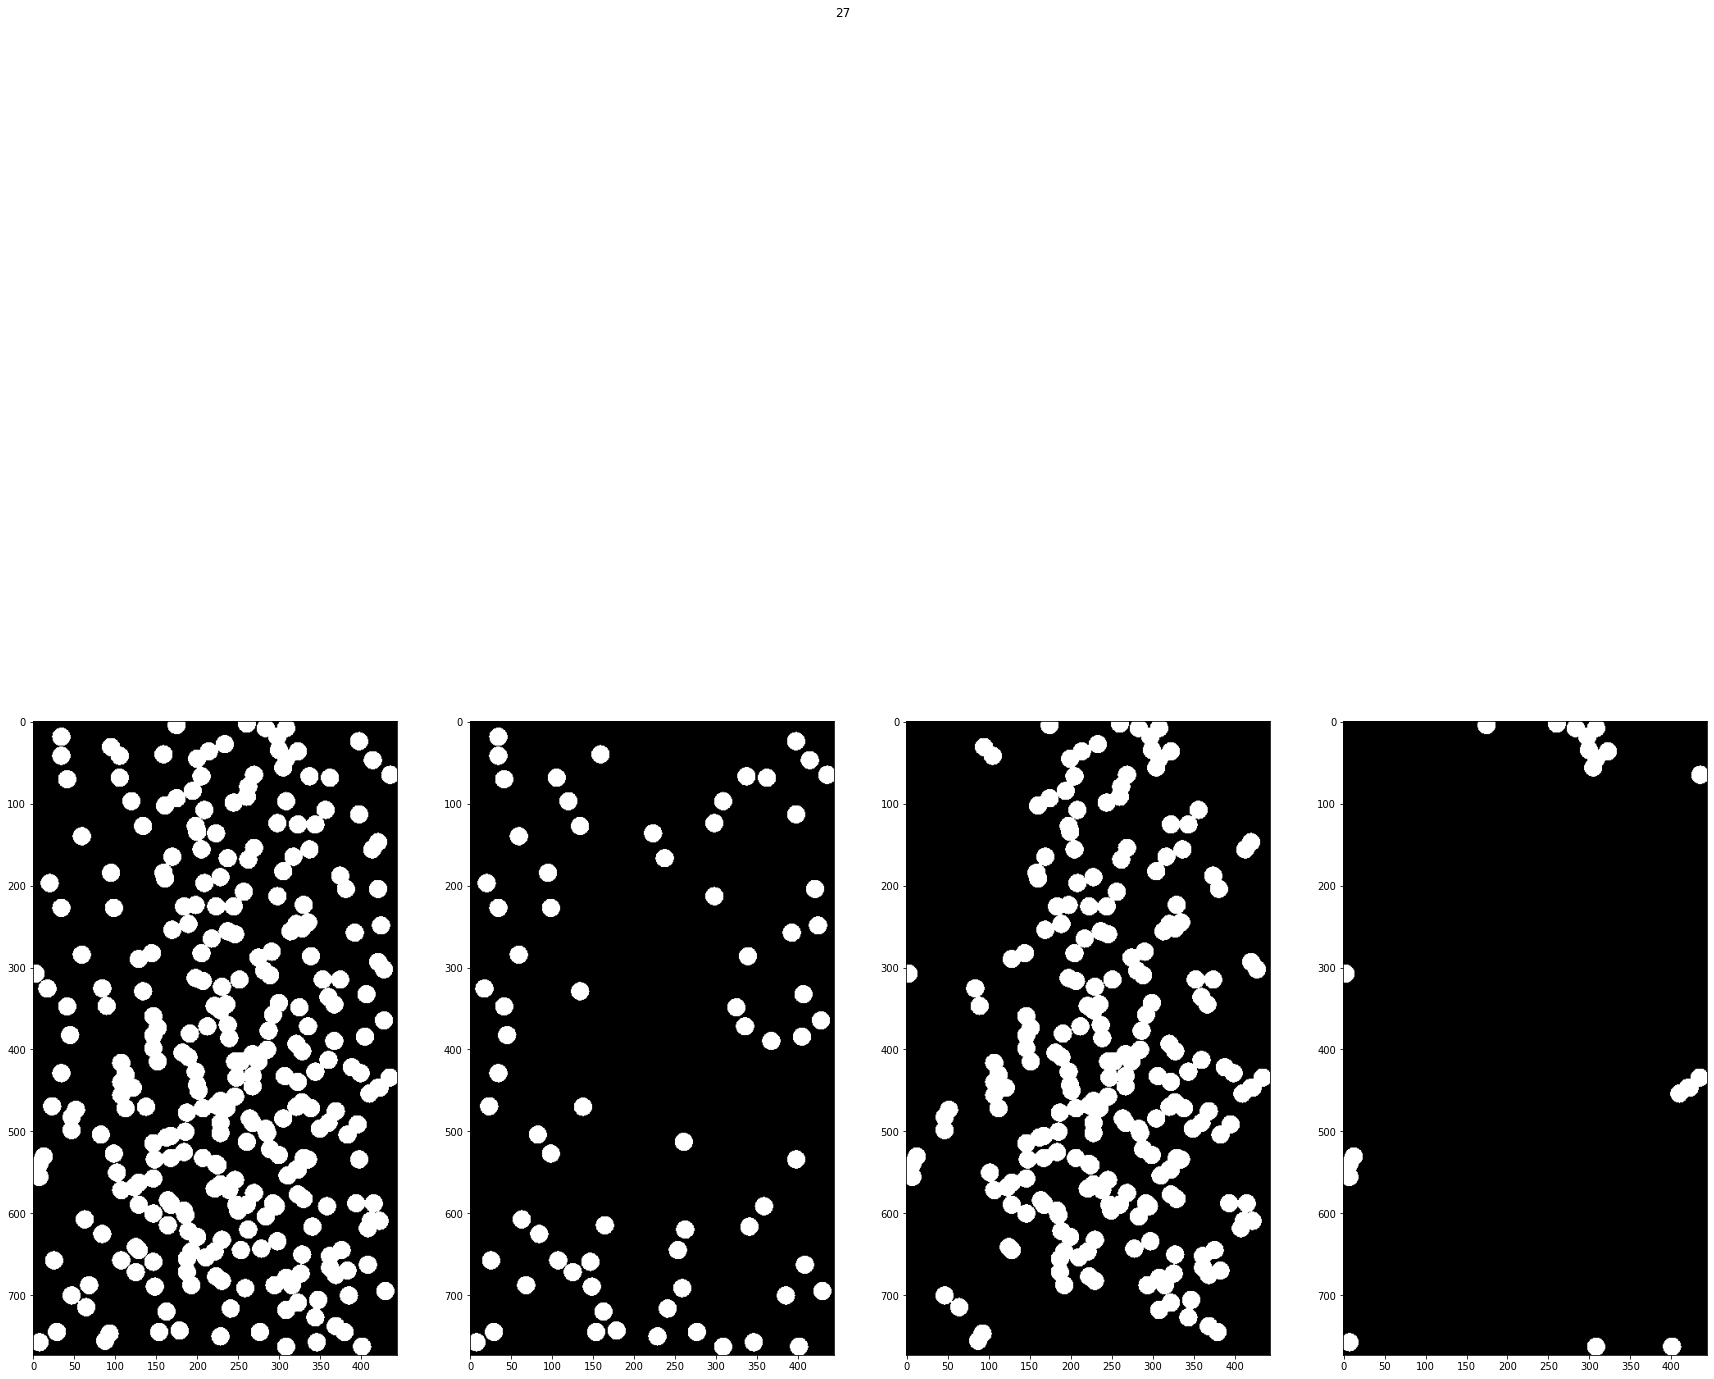

In [ ]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
%cd '/content/drive/My Drive/Colab Notebooks/Assignment_3/src'

parent = [-1]*100000000
size = [1]*100000000

def find(u):
    if(parent[u] == -1):
        return u
    x = find(parent[u])
    parent[u] = x
    return x


def Union(u,v):
    
    pu = find(u)
    pv = find(v)
    if(pu == pv):
        return
    size[pv] += size[pu]
    parent[pu] = pv

def labelimage(img, threshold):
  limg = np.zeros(img.shape, dtype=int)
  print(limg.shape)
  row, col = img.shape
  color = 1
  for i in range(len(parent)):
    parent[i] = -1
    size[i] = 1
  boundary = []
  for i in range(0,row):
    for j in range(0,col):
      if img[i][j] == 255:
        a = 0
        b = 0

        if i > 0:
          a = limg[i-1][j]
        if j > 0:
          b = limg[i][j-1]

        if a == 0 and b == 0:
          limg[i][j] = color
          color += 1
        elif a == 0:
          limg[i][j] = b
          size[b] += 1
        elif b == 0:
          limg[i][j] = a
          size[a] += 1
        else:
          limg[i][j] = min(a,b)
          Union(max(a,b), min(a, b))

        if i == 0 or j == 0 or i == row-1 or j == col-1:
          boundary.append(limg[i][j])

  totalcol = 0
  colorroot = {}
  for i in range(color):
    if parent[i] == -1:
      totalcol += 1
 
      colorroot[i] = list(np.random.choice([0,256], size=3)) 
  for i in range(len(boundary)):
    boundary[i] = find(boundary[i])
  
  opimg = np.zeros([img.shape[0], img.shape[1],3], dtype=int)  
  opimg1 = np.zeros([img.shape[0], img.shape[1],3], dtype=int)  
  opimg2 = np.zeros([img.shape[0], img.shape[1],3], dtype=int)  

  for i in range(0,row):
    for j in range(0,col):
      if img[i][j] == 0:
        continue

      if img[i][j] == 255 and size[find(limg[i][j])] < threshold:
        opimg[i][j] = 255 #colorroot[find(limg[i][j])]
        opimg1[i][j] = 0
      else:
        opimg[i][j] = 0
        opimg1[i][j] = 255 #colorroot[find(limg[i][j])]
      

      if find(limg[i][j]) in boundary:
        opimg2[i][j] = 255
        
  # print("Total color ", totalcol)
  # print("Color ",color)
  return [opimg,opimg1,opimg2]

img = cv2.imread('../images/coins.jpg',0)
ret, img = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY) 

threshold = 27
fig = plt.figure(figsize=(30,30))
fig.add_subplot(1, 4, 1)
plt.imshow(img, cmap = 'gray')

opimg,opimg1,opimg2 = labelimage(img, threshold)
# fig = plt.figure(figsize=(10,10))
fig.add_subplot(1, 4, 2)
fig.suptitle(str(threshold))
plt.imshow(opimg)   

fig.add_subplot(1, 4, 3)
fig.suptitle(str(threshold))
plt.imshow(opimg1)   


fig.add_subplot(1, 4, 4)
fig.suptitle(str(threshold))
plt.imshow(opimg2)

#Q4

In [ ]:
parent = [-1]*100000000
def find(u):
    if(parent[u] == -1):
        return u
    x = find(parent[u])
    parent[u] = x
    return x


def Union(u,v):
    pu = find(u)
    pv = find(v)
    if (pu == pv):
        return
    parent[pu] = pv

def labelimage(img):
  limg = np.zeros(img.shape, dtype=int)
  
  row, col = img.shape
  color = 1
  for i in range(len(parent)):
    parent[i] = -1

  for i in range(1,row):
    for j in range(1,col):
      if img[i][j] == 255:
        a = limg[i-1][j]
        b = limg[i][j-1]
        if a == 0 and b == 0:
          limg[i][j] = color
          color += 1
        elif a == 0:
          limg[i][j] = b
        elif b == 0:
          limg[i][j] = a
        else:
          limg[i][j] = min(a,b)
          Union(max(a,b), min(a, b))

  components = 0
  colorroot = {}
  for i in range(1,color):
    if parent[i] == -1:
      components += 1
      colorroot[i] = list(np.random.choice([0,256], size=3)) 

  
  opimg = np.zeros([img.shape[0], img.shape[1],3], dtype=int)  
  labelimg = np.zeros([img.shape[0], img.shape[1]], dtype=int)
  
  for i in range(1,row):
    for j in range(1,col):
      if img[i][j] == 255:
        opimg[i][j] = colorroot[find(limg[i][j])]
        labelimg[i][j] = find(limg[i][j])
  
  return color, components, labelimg

In [ ]:
def getComponent(color, img):
  newimg = np.zeros(img.shape, dtype=int)
  row,col = img.shape
  
  for i in range(row):
    for j in range(col):
        if img[i][j] == color:
          newimg[i][j] = 1

  return newimg

def findCournerPoints(img):
  p1 = np.array([[-1 ,0, 0],
                 [ 1 ,1, 0],
                 [-1 ,1,-1]])
  
  p2 = np.array([[-1 ,1 ,-1],
                 [0  ,1 ,1],
                 [0 , 0 ,-1]])
  
  p3 = np.array([[-1, 1,-1],
                 [1, 1, 0],
                 [-1,0, 0]])

  p4 = np.array([[0, 0, -1],
                 [0, 1,  1],
                 [-1,1, -1]]) 
  
  p1_match = p2_match = p3_match = p4_match = 0
  rows,cols = img.shape
  for x in range(1,rows-1):
    for y in range(1,cols-1):
      
      match = True
      for xx in range(-1,2):
        for yy in range(-1,2):
          adjx = x + xx
          adjy = y + yy
          if p1[xx+1][yy+1] != -1 and img[adjx][adjy] != p1[xx+1][yy+1]:
            match = False
            break
      if match:
        p1_match += 1

      match = True
      for xx in range(-1,2):
        for yy in range(-1,2):
          
          adjx = x + xx
          adjy = y + yy
          
          if p2[xx+1][yy+1] != -1 and img[adjx][adjy] != p2[xx+1][yy+1]:
            match = False
            break
      
      if match:
        p2_match += 1

      match = True
      for xx in range(-1,2):
        for yy in range(-1,2):
          
          adjx = x + xx
          adjy = y + yy
          if p3[xx+1][yy+1] != -1 and img[adjx][adjy] != p3[xx+1][yy+1]:
            match = False
            break
      if match:
        p3_match += 1

      match = True
      for xx in range(-1,2):
        for yy in range(-1,2):
          
          adjx = x + xx
          adjy = y + yy
          if p4[xx+1][yy+1] != -1 and img[adjx][adjy] != p4[xx+1][yy+1]:       
            match = False
            break
      if match:
        p4_match += 1
  
      #print(p1_match,p2_match,p3_match,p4_match)
      if (p1_match==1 and p2_match==1 and p3_match==1 and p4_match==1):
        
          for xx in range(-1,2):
            for yy in range(-1,2):
               adjx = x + xx
               adjy = y + yy
            #    print(img[adjx][adjy]," ")
            # print()
          return True

  return False

img = cv2.imread('../images/objects.png',0)
colors, total_components, components = labelimage(img)
square_img = np.zeros(img.shape)
circle_img = np.zeros(img.shape)
# plt.imshow(components)
no_square = 0
square_list = []
circle_list = []
object_list = []
for color in range(1,colors):
  if parent[color] == -1:
    img = getComponent(color, components)
    # plt.figure()
    # plt.imshow(img)
    if findCournerPoints(img):
      no_square += 1
      square_img += img
      square_list.append(img)
    else:
      circle_img += img
      circle_list.append(img)
    object_list.append(img)
    
  

##(A) Objects with Holes

No of Square with holes  6


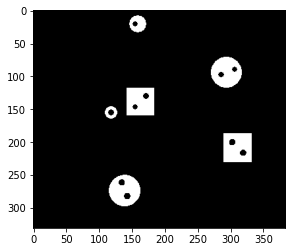

In [ ]:
ans = np.zeros(square_img.shape)
no = 0
for img in object_list:
  inv_img = 255 - img
  
  color, no_comp,opimg = labelimage(inv_img)
  if no_comp > 1:
    ans += img
    no += 1
print("No of Square with holes ",no)
plt.imshow(ans, cmap='gray')

##(B) Square Objects

No of Squares  11


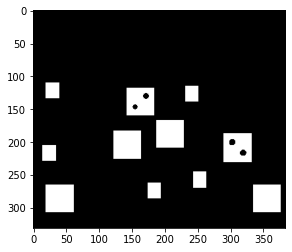

In [ ]:
print("No of Squares ", len(square_list))
plt.figure()
plt.imshow(square_img, cmap =  'gray')

##(C) Square Objects with holes

No of Square with holes  2


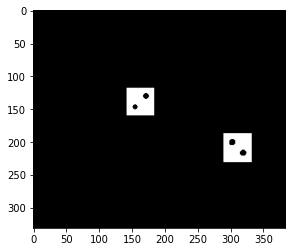

In [ ]:
ans = np.zeros(square_img.shape)
no = 0
for img in square_list:
  inv_img = 255 - img
  
  color, no_comp,opimg = labelimage(inv_img)
  if no_comp > 1:
    ans += img
    no += 1
print("No of Square with holes ",no)
plt.imshow(ans, cmap='gray')

##(D) Circular Objects with No holes

No of circles with no holes  12


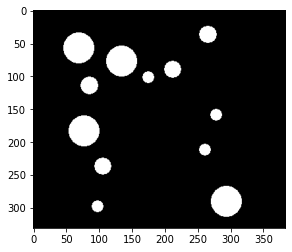

In [ ]:
ans = np.zeros(square_img.shape)
no = 0
for img in circle_list:
  inv_img = 255 - img
  
  color, no_comp,opimg = labelimage(inv_img)
  if no_comp == 1:
    ans += img
    no += 1

print("No of circles with no holes ", no)
plt.imshow(ans, cmap='gray')

#Q5

##(A)

In [ ]:
parent = [-1]*100000000
def find(u):
    if(parent[u] == -1):
        return u
    x = find(parent[u])
    parent[u] = x
    return x


def Union(u,v):
    pu = find(u)
    pv = find(v)
    if(pu == pv):
        return
    parent[pu] = pv

def labelimage(img):
  limg = np.zeros(img.shape, dtype=int)
  
  row, col = img.shape
  color = 1
  for i in range(len(parent)):
    parent[i] = -1

  for i in range(1,row):
    for j in range(1,col):
      if img[i][j] == 255:
        a = limg[i-1][j]
        b = limg[i][j-1]
        c = limg[i-1][j-1]

        if a == 0 and b == 0 and c == 0:
          limg[i][j] = color
          color += 1
        elif a == 0 and c == 0:
          limg[i][j] = b
        elif b == 0 and c == 0:
          limg[i][j] = a
        elif a == 0 and b == 0:
          limg[i][j] = c
        elif a == 0: 
          limg[i][j] = min(c,b)
          Union(max(c,b), min(c, b))
        elif b == 0:
          limg[i][j] = min(a,c)
          Union(max(a,c), min(a, c))
        elif c == 0:
          limg[i][j] = min(a,b)
          Union(max(a,b), min(a,b))
        else:
          limg[i][j] = min(a, min(b,c))
          Union(a,b)
          Union(b,c)

  totalcol = 0
  colorroot = {}
  for i in range(1,color):
    if parent[i] == -1:
      totalcol += 1
      colorroot[i] = list(np.random.choice(range(256), size=3)) 

  
  opimg = np.zeros([img.shape[0], img.shape[1],3], dtype=int)  
  for i in range(1,row):
    for j in range(1,col):
      if img[i][j] == 255:
        opimg[i][j] = colorroot[find(limg[i][j])]
 
  print("Total Componenets : ", totalcol)
  return opimg


Total Componenets  22


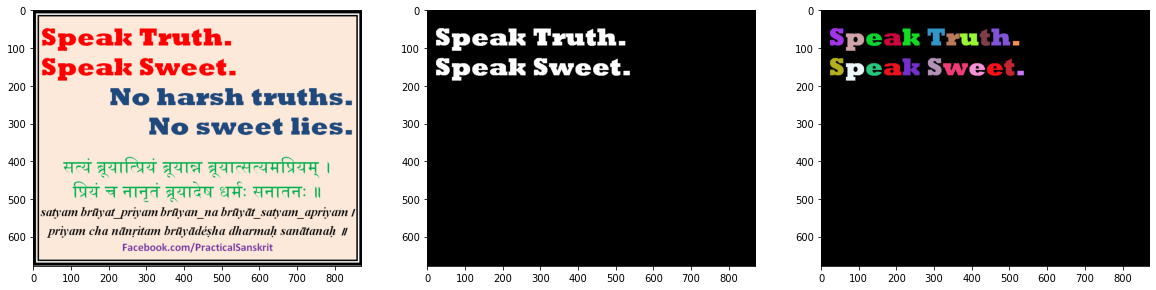

In [ ]:
img = cv2.imread('../images/colourful_text.png')
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img_hsv=cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

lower_red = np.array([0,50,50])
upper_red = np.array([10,255,255])
mask0 = cv2.inRange(img_hsv, lower_red, upper_red)

lower_red = np.array([170,50,50])
upper_red = np.array([180,255,255])
mask1 = cv2.inRange(img_hsv, lower_red, upper_red)

mask = mask0+mask1

fig = plt.figure(figsize=(20,20))
fig.add_subplot(1, 3, 1)
plt.imshow(rgb)
fig.add_subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(mask, cv2.COLOR_BGR2RGB))
comp = labelimage(mask)
fig.add_subplot(1,3, 3)
plt.imshow(comp)

Total Componenets :  27


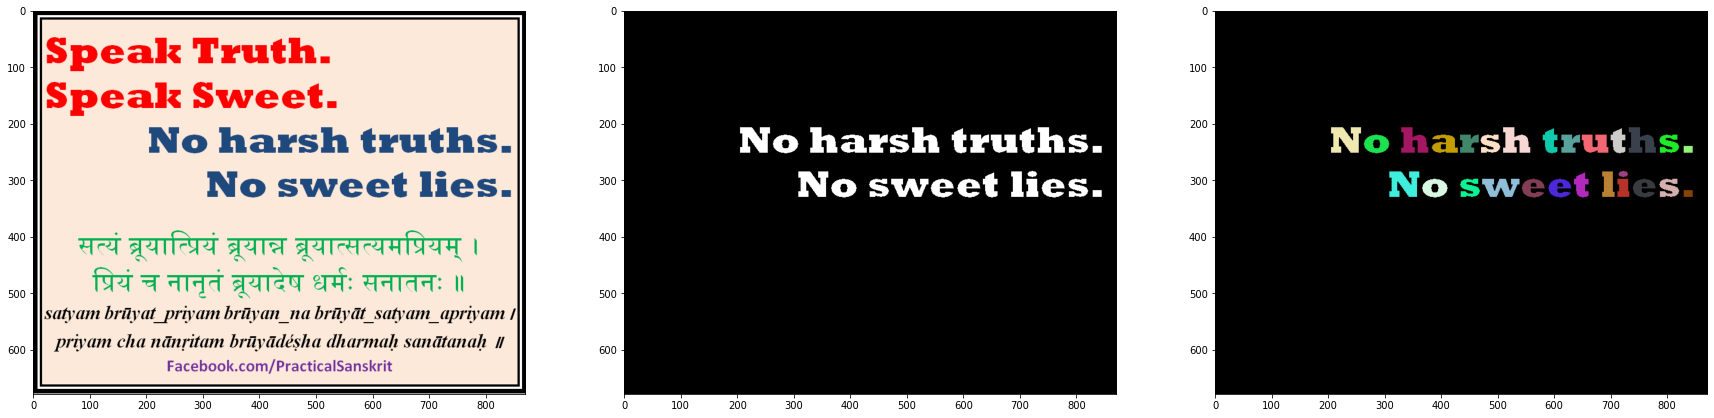

In [ ]:
img = cv2.imread('../images/colourful_text.png')
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img_hsv=cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

blue_lower=np.array([100,150,0],np.uint8)
blue_upper=np.array([110,255,255],np.uint8)

mask = cv2.inRange(img_hsv, blue_lower, blue_upper)

fig = plt.figure(figsize=(30,30))
fig.add_subplot(1, 3, 1)
plt.imshow(rgb)
fig.add_subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(mask, cv2.COLOR_BGR2RGB))
comp = labelimage(mask)

fig.add_subplot(1,3, 3)
plt.imshow(comp)

Total Componenets  32


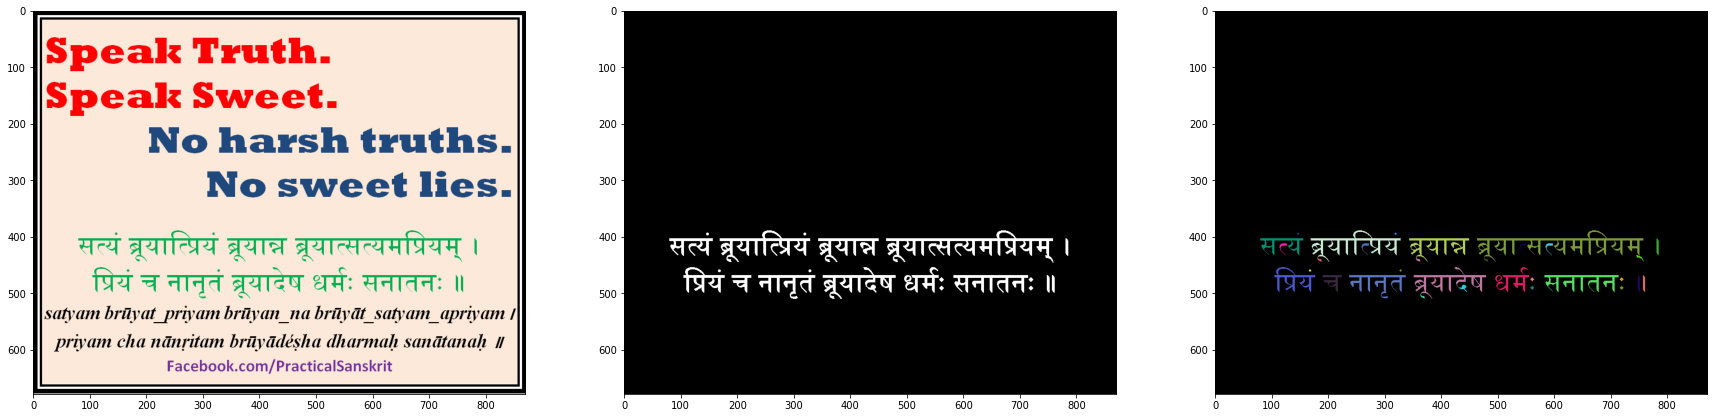

In [ ]:
img = cv2.imread('../images/colourful_text.png')
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_hsv=cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

lower_red = np.array([65,60,60])
upper_red = np.array([80, 255,255])
mask = cv2.inRange(img_hsv, lower_red, upper_red)


fig = plt.figure(figsize=(30,30))
fig.add_subplot(1, 3, 1)
plt.imshow(rgb)
fig.add_subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(dilation, cv2.COLOR_BGR2RGB))
comp = labelimage(mask)
fig.add_subplot(1,3, 3)
plt.imshow(comp)

Total Componenets  343


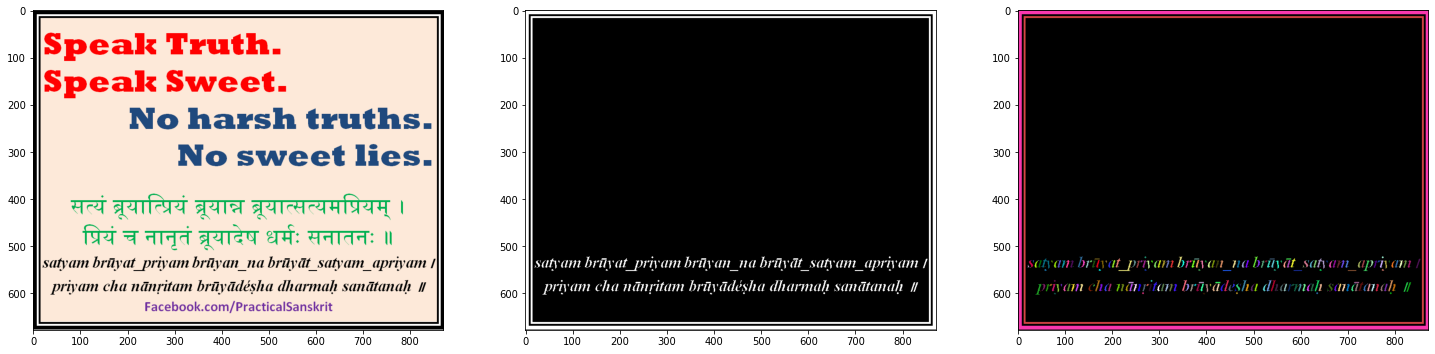

In [ ]:
img = cv2.imread('../images/colourful_text.png')
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


img_hsv=cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

lower_red = np.array([0, 0, 0])
upper_red = np.array([50, 50, 100])
mask = cv2.inRange(img_hsv, lower_red, upper_red)


fig = plt.figure(figsize=(25,25))
fig.add_subplot(1, 3, 1)
plt.imshow(rgb)
fig.add_subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(mask, cv2.COLOR_BGR2RGB))
comp = labelimage(mask)
fig.add_subplot(1,3, 3)
plt.imshow(comp)

Total Componenets  32


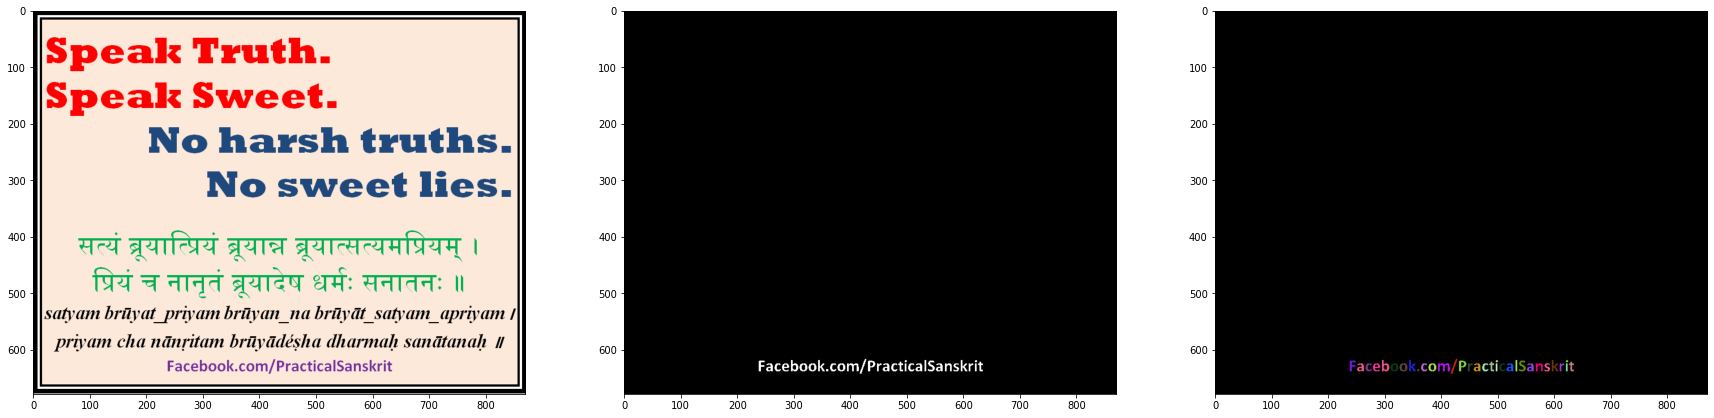

In [ ]:
img = cv2.imread('../images/colourful_text.png')
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img_hsv=cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

lower_red = np.array([110,50,50])
upper_red = np.array([255,255,255])
mask = cv2.inRange(img_hsv, lower_red, upper_red)



fig = plt.figure(figsize=(30,30))
fig.add_subplot(1, 3, 1)
plt.imshow(rgb)
fig.add_subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(mask, cv2.COLOR_BGR2RGB))
comp = labelimage(mask)

fig.add_subplot(1,3, 3)
plt.imshow(comp)

#Q7

In [ ]:
import math
from math import cos
from math import sin

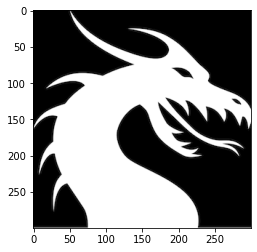

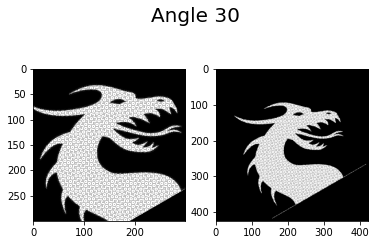

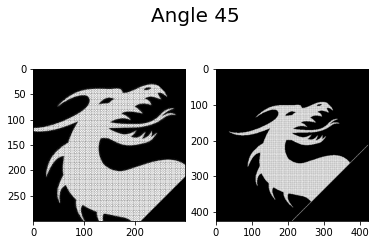

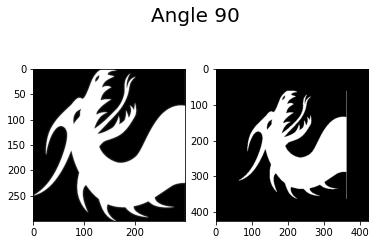

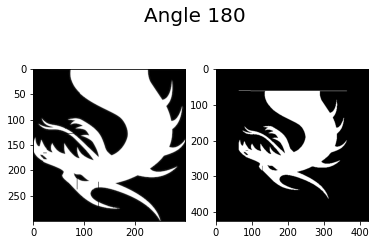

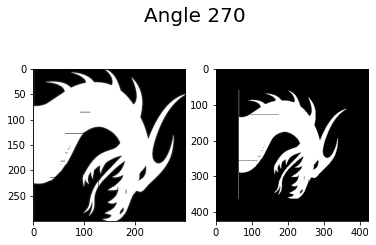

In [ ]:

def rotateImg(img ,theta, retain):
  
    if retain:
      oldwidth = img.shape[1]
      oldheight = img.shape[0]

      newwidth = newheight = int(math.sqrt(oldwidth*oldwidth + oldheight*oldheight))

      newimg = np.zeros([newwidth, newheight])

      diffx = int((newwidth - oldwidth)/2)
      diffy = int((newheight - oldheight)/2)

      for x in range(img.shape[1]):
        for y in range(img.shape[0]):
          newimg[x+diffx][y+diffy] = img[x][y]
     
      img = newimg
    
    theta = theta * ( pi / 180 )
    cenx = int(img.shape[1] / 2)
    ceny = img.shape[0] / 2
    op = np.zeros(img.shape)
    rows, cols = img.shape
    
    for x in range(rows):
        for y in range(cols):
            rx = x - cenx
            ry = y - ceny
            newx = int((rx) * cos(theta) - (ry) * sin(theta) + cenx)
            newy = int((rx) * sin(theta) + (ry) * cos(theta) + ceny)
          
            if 0 <= newx < rows and 0 <= newy < cols:
                op[int(newx)][int(newy)] = img[x][y]
    return op

img = cv2.imread('../images/dragon.png' ,0)
plt.figure()
plt.imshow(img, cmap = "gray")

for angle in [30,45,90,180,270]:
  rotimg = rotateImg(img,angle, False)
  fig = plt.figure()
  fig.add_subplot(1, 2, 1)
  fig.suptitle('Angle ' + str(angle), fontsize=20)
  plt.imshow(rotimg, cmap = "gray")

  rotimg = rotateImg(img,angle, True)
  ret, rotimg = cv2.threshold(rotimg, 128, 255, cv2.THRESH_BINARY) 
  fig.add_subplot(1, 2, 2)
  fig.suptitle('Angle ' + str(angle), fontsize=20)
  plt.imshow(rotimg, cmap = "gray")
